In [ ]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp37-none-any.whl size=26820 sha256=60587f132d7e5b131adcb3a5fcfa894e3ab620ca7e2cc299c3826dd81ac71706
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


<h1> PARTIE 1 :</h1>












In [ ]:
import pandas as pd
import os
import pandasql as ps
import plotly.express as px

In [ ]:
import pymysql.cursors  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#Connectez- vous à la base de données.
connection = pymysql.connect(host='localhost',
                             user='root',                             
                             db='ipssi',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
connection 
print ("connect successful!!")
cursor = connection.cursor()



airlines=pd.read_sql_query("SELECT * FROM airlines ", connection)
airports=pd.read_sql_query("SELECT * FROM airports ", connection)
flights=pd.read_sql_query("SELECT * FROM flights ", connection)
planes=pd.read_sql_query("SELECT * FROM planes ", connection)
weather = pd.read_sql_query("SELECT * FROM weather ", connection)

---------------------
### **Question 2:**
#####***2.1 - Aéroport de départ le plus fréquenté :***


In [ ]:
#Grouper les vols par aeoroport de départ : 
vols = flights.groupby('origin')

#classer les aeroport par nombre de vols :
classement = vols.count().sort_values( by= 'flight' , ascending=False )

res = pd.merge(airports, classement, left_on = 'faa', right_on = 'origin', how = 'inner')
#afficher le top 1
top_aeroport = res[['faa' , 'name' , 'flight']].head(1)
top_aeroport

,faa,name,flight
0,EWR,Newark Liberty Intl,120835


#####***2.2 les 10 destinations les plus prisées :*** 

In [ ]:
flights.\
       groupby('dest').\
       count().\
       sort_values(by='flight' , ascending=False)['flight'].\
       head(10)
       #plot.bar()



dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
Name: flight, dtype: int64

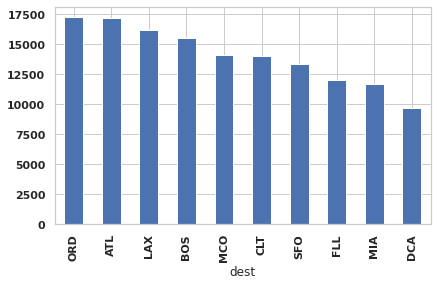

In [ ]:
#Grouper les vols par aeoroport de destinations : 

vols = flights.groupby('dest')

##classer les aeroport par nombre de vols :
classement = vols.count().sort_values( by= 'flight' , ascending=False )

#afficher le top 10
top_aeroport = classement.flight.head(10) 
top_aeroport
top_aeroport.plot.bar()

#####***2.3 - les 10 destinations les moins prisées :***

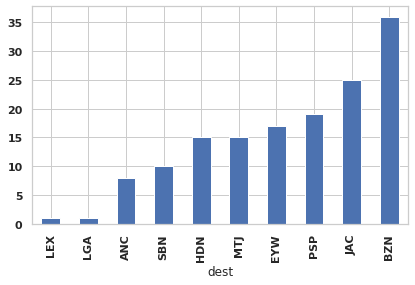

In [ ]:
#Grouper les vols par aeoroport de destinations : 
vols = flights.groupby('dest')

##classer les aeroport par nombre de vols :
classement = vols.count().sort_values( by= 'flight' , ascending=True )

#afficher le moins fréquenté :
last_aeroport = classement.head(10) 
last_aeroport['flight']
last_aeroport['flight'].plot.bar()

#####***2.4 - les 10 avions les plus décollés :***

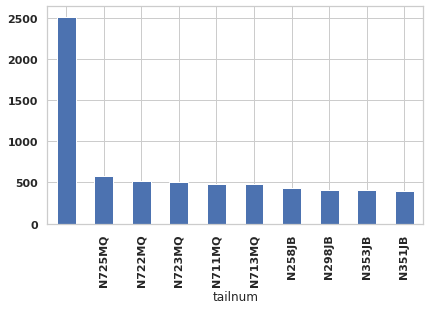

In [ ]:
#Grouper les vols par aeoroport de destinations : 
vols = flights.groupby('tailnum')

##classer les aeroport par nombre de vols :
classement = vols.count().sort_values( by= 'flight' , ascending=False )

#afficher le moins fréquenté :
top_planes = classement.head(10)
res1 = top_planes['flight']
res1.plot.bar()

#####***2.4 - Les 10 avions les moins décollées :*** 


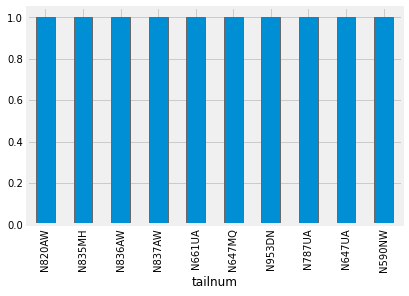

In [ ]:
#Grouper les vols par aeoroport de destinations : 
vols = flights.groupby('tailnum')

##classer les aeroport par nombre de vols :
classement = vols.count().sort_values( by= 'flight' , ascending=True )

#afficher le moins fréquenté :
last_planes = classement.head(10)
res2 = last_planes['flight']
res2.plot.bar()

---------------------
### Question 3:




#####***3.1 - Nombre de déstination désservies par chaque compagnies :***

         dest
carrier      
9E         49
AA         19
AS          1
B6         42
DL         40
EV         61
F9          1
FL          3
HA          1
MQ         20
OO          5
UA         47
US          6
VX          5
WN         11
YV          3


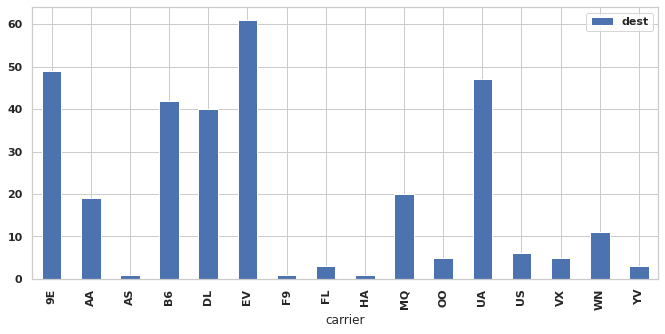

In [ ]:
# je clean ma data en choissisant que les données dont j'aurais besoins
flight1 = flights[['carrier','dest' ]]

# je groupe par compagnies
flight1_group = flight1.groupby('carrier')

# je calcules le nombre de destinations par compagnies
#en eleiminant les doublons
compagnie_destination = flight1_group.nunique()
print(compagnie_destination)

compagnie_destination.plot.bar(figsize=(10,5))

#####***3.2 - Nombre de déstinations désservies par chaque compagnies par aéroport origine:***


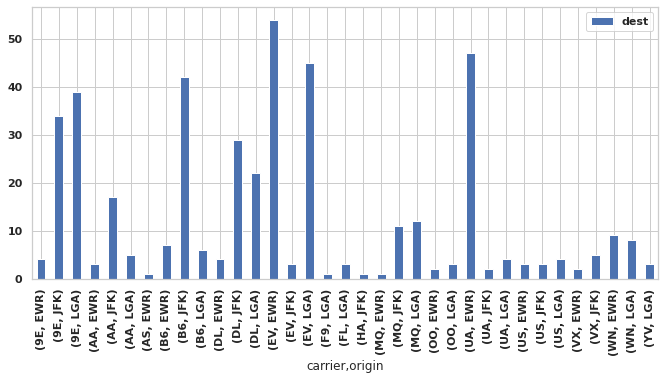

In [ ]:
# je clean ma data en choissisant que les données dont j'aurais besoins
flight1 = flights[['carrier','dest' , 'origin' ]]

# je groupe par compagnies et origine
flight1_group = flight1.groupby(['carrier' , 'origin'])

# je calcules le nombre de destinations par compagnies
#en eleiminant les doublons

compagnie_dest_origin = flight1_group.nunique()
compagnie_dest_origin
compagnie_dest_origin.plot.bar(figsize=(10,5))

--------------------------------
### Question 4:


#####***4.1 - les vols ayant atterri à Houston (IAH ou HOU) :***





In [ ]:
vols = flights[(flights['dest'] == 'IAH') | (flights['dest'] == 'HOU')  ]
nb_vols = vols['flight'].count()
nb_vols

9313

#####***4.2 - les vols de NYC vers SEATTLE :***




In [ ]:
vols1 = flights[(flights['origin'] == 'NYC') | (flights['dest'] == 'SEA')  ]
nb_vols = vols1['flight'].count()
nb_vols

3923

#####***4.3 - Compagnies à destination de SEATTLE :***

In [ ]:
#je clean ma base de données
flights1 = flights[['carrier' , 'dest']]

#je filtre les vols par destination SEA
destination_sea = flights1[flights1['dest'] == 'SEA']
destination_sea['carrier'].nunique()


5

#####***4.4 - Avions à destination de SEATTLE :***

In [ ]:
#je clean ma base de données
flights1 = flights[['tailnum' , 'dest']]

#je filtre les vols par destination SEA
destination_sea = flights1[flights1['dest'] == 'SEA']
destination_sea['tailnum'].nunique()

936

---------------------------------
### Question 5:

Trouver le nombre de vols unique par destination voir l’aperçu. Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms des explicites des aéroports) ? indice : voir l’aperçu

#####***5.1 - nombre de vols uniques par destination :***

In [ ]:
#je clean ma base de données
flights2 = flights[['flight' , 'dest']]

#je filtre les vols par destination 

group_dest = flights2.groupby('dest')
group_dest.nunique().sort_values(by = 'flight', ascending = False)

,flight
dest,
IAH,665
ORD,617
BOS,469
CLT,449
DEN,435
...,...
CRW,1
LEX,1
LGA,1


#####**Tri des vols :**

In [ ]:
ps.sqldf('select a.name as airport_dest,b.name as airport_origin,a.name as name_carrier,f.origin,f.dest,f.carrier,count(*) as flight from flights f join airports a on f.dest = a.faa join airports b on f.origin = b.faa group by f.dest order by f.dest,f.origin,f.carrier desc')

,airport_dest,airport_origin,name_carrier,origin,dest,carrier,flight
0,Albuquerque International Sunport,John F Kennedy Intl,Albuquerque International Sunport,JFK,ABQ,B6,254
1,Nantucket Mem,John F Kennedy Intl,Nantucket Mem,JFK,ACK,B6,265
2,Albany Intl,Newark Liberty Intl,Albany Intl,EWR,ALB,EV,439
3,Ted Stevens Anchorage Intl,Newark Liberty Intl,Ted Stevens Anchorage Intl,EWR,ANC,UA,8
4,Hartsfield Jackson Atlanta Intl,Newark Liberty Intl,Hartsfield Jackson Atlanta Intl,EWR,ATL,EV,17215
...,...,...,...,...,...,...,...
96,Tampa Intl,Newark Liberty Intl,Tampa Intl,EWR,TPA,UA,7466
97,Tulsa Intl,Newark Liberty Intl,Tulsa Intl,EWR,TUL,EV,315
98,Cherry Capital Airport,La Guardia,Cherry Capital Airport,LGA,TVC,EV,101
99,Mc Ghee Tyson,La Guardia,Mc Ghee Tyson,LGA,TYS,9E,631


------------------------------------------------------
###Question 6
Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? Quelles sont les compagnies qui desservent l’ensemble de destinations ?

Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des compagnies.

In [ ]:
ps.sqldf("select f.carrier,name,count(distinct(dest)) as All_Dest,count(distinct(origin)) as All_Oirgin from flights f join airlines a on a.carrier = f.carrier group by f.carrier ")

,carrier,name,All_Dest,All_Oirgin
0,9E,Endeavor Air Inc.,46,3
1,AA,American Airlines Inc.,19,3
2,AS,Alaska Airlines Inc.,1,1
3,B6,JetBlue Airways,42,3
4,DL,Delta Air Lines Inc.,40,3
5,EV,ExpressJet Airlines Inc.,60,3
6,F9,Frontier Airlines Inc.,1,1
7,FL,AirTran Airways Corporation,3,1
8,HA,Hawaiian Airlines Inc.,1,1
9,MQ,Envoy Air,19,3


Observations :
 

*   La compagnie aérienne avec le plus de destinationsis EV (ExpressJet Airlines)
*   suivie par Endeavor Air Inc.
La compagnie aérienne ayant le moins de destination est Alaska Airlines Inc,Hawaiian Airlines Inc and Frontier Airlines Inc.



------------------------------
### Question 7
Quelles sont les destinations qui sont exclusives à certaines compagnies (indice : 28 destinations en touta lors que sur R on trouve 29 pourquoi) ?

In [ ]:
# Create table with all the airlines and there destination
dest = ps.sqldf('select f.dest,a.name,count(distinct(f.carrier))  as nb_airlines from flights f join airlines a on a.carrier = f.carrier group by f.dest ')
# Keep only the exclusive destination
ps.sqldf('select count(*),count(distinct dest) from dest where nb_airlines = 1 ')

,count(*),count(distinct dest)
0,29,29


#### Here the list of exclusive destinations :  

In [ ]:
dest.loc[dest['nb_airlines'] == 1]


,dest,name,nb_airlines
0,ABQ,JetBlue Airways,1
1,ACK,JetBlue Airways,1
2,ALB,ExpressJet Airlines Inc.,1
3,ANC,United Air Lines Inc.,1
9,BHM,ExpressJet Airlines Inc.,1
15,BUR,JetBlue Airways,1
17,BZN,United Air Lines Inc.,1
19,CAK,AirTran Airways Corporation,1
20,CHO,ExpressJet Airlines Inc.,1
25,CRW,Envoy Air,1


----------------------------------------------
### Question 8

Filtrer le vol pour trouver ceux exploités par United, American ou Delta (indice : 139 504 vols en tout) ?



In [ ]:
voyages = ps.sqldf("select f.carrier,a.name as airline,count(*) as volume from flights f join airlines a on f.carrier = a.carrier  where f.carrier in('AA','DL','UA') group by f.carrier")
voyages

,carrier,airline,volume
0,AA,American Airlines Inc.,32729
1,DL,Delta Air Lines Inc.,48110
2,UA,United Air Lines Inc.,58665


In [ ]:
import plotly.express as px
fig = px.bar(voyages, x='airline', y='volume')
fig.show()


The volumes :


*   American Airlines Inc. 32729
*   Delta Air Lines Inc. 48110
*   United Air Lines Inc. 58665







#**------------------------------------------PARTIE 2--------------------------------------------**

D'un point de vue technique, les principaux aspects de python couverts tout au long du cahier sont:



*   Visualisation: matplolib, seaborn, fond de cartee
*   Manipulation de données: pandas, numpy
*   Modélisation: sklearn, scipy
*   Définition de classes: régression, figures

Lors de notre démarches, on avaient l'intention de créer des chiffres de bonne qualité à partir desquels les informations seraient facilement accessibles au premier coup d'œil. Un aspect important du métier de data scientist consiste à divulguer ses découvertes à des personnes qui n'ont pas forcément de connaissances dans les aspects techniques maîtrisés par les data scientists. **Les graphiques** sont sûrement l'outil le plus **puissant** pour atteindre cet objectif, et la maîtrise des techniques de visualisation semble donc importante.

In [ ]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data/flights.csv', low_memory=False)

 
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
column type,int64,int64,int64,object,int64,object,object,int64,object,object,int64,object,object,object,object,int64,int64,int64,object
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
airports = pd.read_csv("data/airports.csv")

## **1 . Cleaning**

Dans la base de données initiale, les dates sont codées selon 4 variables: **YEAR, MONTH, DAY et DAY_OF_WEEK**.  Python propose le format **datetime** qui est vraiment pratique pour travailler avec des dates et des heures , donc on les convertit en ce format:

In [ ]:
df['DATE'] = pd.to_datetime(df[['year','month', 'day']])

Dans la variable **SCHEDULED_DEPARTURE**, l'heure du décollage est codée comme un flotteur où les deux premiers chiffres indiquent l'heure et les deux derniers, les minutes. Ce format n'est pas pratique ,pour cela on fusionne l'heure du décollage avec la date de vol. 

In [ ]:
def format_heure_str(chaine):
    if pd.isnull(chaine) or chaine.isnumeric() == False or int(chaine) >2399 :
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
    
    
def format_heure_int(chaine):
    if pd.isnull(chaine) :
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure


def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure_int(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [ ]:
df['dep_time'] = df['dep_time'].apply(format_heure_str)
df['sched_arr_time'] = df['sched_arr_time'].apply(format_heure_int)
df['sched_dep_time'] = create_flight_time(df, 'sched_dep_time')
df['arr_time'] = df['arr_time'].apply(format_heure_str)

Le contenu des variables **DEPARTURE_TIME** et **ARRIVAL_TIME** peut être un peu trompeur car ils ne contiennent pas les dates. Par exemple, lors de la première saisie de la base de données, le départ prévu est à 0h05 le 1er janvier. La variable DEPARTURE_TIME indique 23h54 et on ne sait donc pas si le vol est parti avant l'heure ou s'il y a eu un retard important. Par conséquent, les variables **DEPARTURE_DELAY** et **ARRIVAL_DELAY** se révèlent plus utiles car elles fournissent directement les délais en minutes. Par conséquent, dans ce qui suit, on n'utilisera pas les variables **DEPARTURE_TIME** et **ARRIVAL_TIME**.

À ce stade, On examine à quel point l'ensemble de données est complet:

In [ ]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,arr_time,8863,97.368280
1,dep_time,8284,97.540205
2,year,0,100.000000
3,minute,0,100.000000
4,hour,0,100.000000
5,distance,0,100.000000
6,air_time,0,100.000000
7,dest,0,100.000000
8,origin,0,100.000000
9,tailnum,0,100.000000


On voit que le facteur de remplissage des variables est assez bon . Ensuite, on supprimera simplement les entrées qui contiennent des valeurs manquantes.

In [ ]:
df.dropna(inplace = True)
flights_clean = df

##**2. Comparaison des Compagnies**

Comme indiqué précédemment, la variable **AIRLINE** contient les abréviations de la compagnie aérienne. Leurs noms complets peuvent être récupérés à partir du fichier **Airlines.csv**

In [ ]:
airlines
abbr_companies = airlines.set_index('carrier')['name'].to_dict()
abbr_companies

{'9E': 'Endeavor Air Inc.',
 'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'ExpressJet Airlines Inc.',
 'F9': 'Frontier Airlines Inc.',
 'FL': 'AirTran Airways Corporation',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'Envoy Air',
 'OO': 'SkyWest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.',
 'YV': 'Mesa Airlines Inc.'}

#####***2.1 Description de la ponctualité compagnies aériennes :***
Dans un premier temps, On considère tous les vols de tous les transporteurs. Ici, le but est de classer les compagnies aériennes en fonction de leur ponctualité et pour cela, On calcule quelques paramètres statistiques de base:

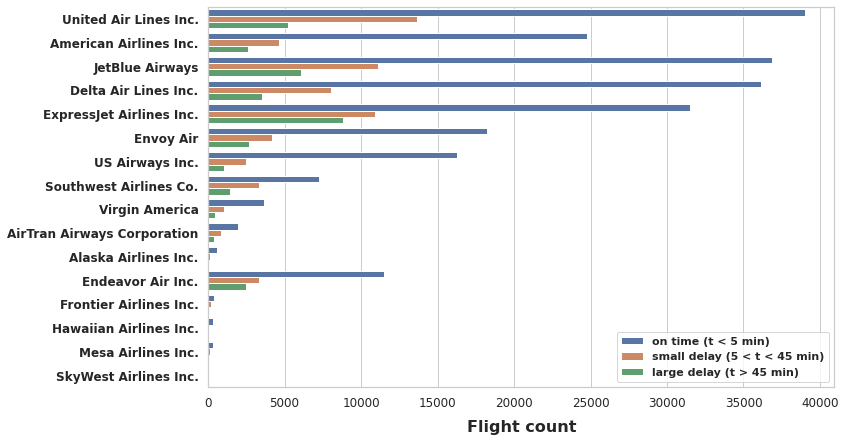

In [ ]:
df['dep_delay'] = df['dep_delay'].astype(int)

#_____________________________________________
# Grouper 
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['dep_delay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="carrier", hue='DELAY_LEVEL', data=df)
#____________________________________________________________________________________
# Remplacer les labels par des noms
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend(loc='lower right')
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()


In [ ]:
delay_count = ps.sqldf('select carrier,DELAY_LEVEL,count(DELAY_LEVEL) as delays from df group by carrier,DELAY_LEVEL')

In [ ]:
count_flights =ps.sqldf('select carrier,count(DELAY_LEVEL) as flights from df group by carrier')

In [ ]:
delay_percent= ps.sqldf('select f.* ,ROUND(f.delays*1.0/flights*100, 2) as percentage from delay_count f  join count_flights p on f.carrier = p.carrier')

In [ ]:
delay_percent_2= ps.sqldf('select * from delay_percent where DELAY_LEVEL = 2')
delay_percent_1 = ps.sqldf('select * from delay_percent where DELAY_LEVEL = 1')

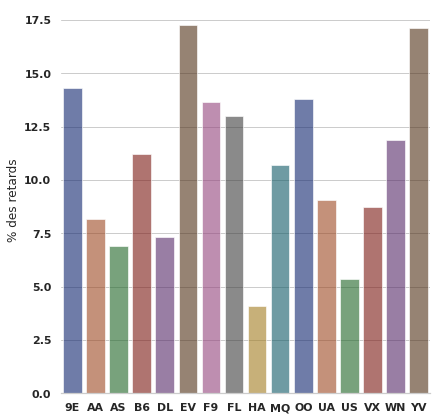

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")




g = sns.catplot(
    data=delay_percent_2, kind="bar",
    x="carrier", y="percentage",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "% des retards")


**Descriptions :**

Ce chiffre donne un décompte des retards inférieurs à 5 minutes, ceux compris entre 5 < t < 45 min et enfin, les retards supérieurs à 45 minutes. On constate donc qu'indépendamment de la compagnie aérienne, les retards supérieurs à 45 minutes ne représentent que quelques pourcentages. Cependant, la proportion de retards dans ces trois groupes dépend de la compagnie aérienne: à titre d'exemple, dans le cas de **Mesa Airlines** Inc, ces retards importants représentent 17,5%, ce qui est considéré comme important mais en même temps, cette compagnie aérienne n'a pas beaucoup de vols. C'est la même chose pour **ExpressJet Airlines Inc**, mais cette fois, cette compagnie aérienne a beaucoup de vols.

En même temps, si nous regardons le graphique des petits retards, nous trouverons d'autres entreprises qui ont le plus grand pourcentage de retards comme Frontier Airlines Inc

conclusion :

Le nombre de vols n'est pas la principale raison de ces retards
Si une compagnie aérienne a un grand volume de retards .

#####***2.2   Analyse sur les départures des compagnies :*** 

In [ ]:
#__________________________________________________________________
# Extraire les statisitique nécéssaires:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Création du DATAFRAME pour chaque compagnie:
global_stats = flights_clean['dep_delay'].groupby(flights_clean['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
carrier,,,,
OO,-14.0,154.0,29.0,12.586207
HA,-16.0,1301.0,342.0,4.900585
YV,-16.0,387.0,544.0,18.898897
F9,-27.0,853.0,681.0,20.201175
AS,-21.0,225.0,712.0,5.804775
FL,-22.0,602.0,3181.0,18.597296
VX,-20.0,653.0,5127.0,12.757363
WN,-13.0,471.0,12072.0,17.646703
9E,-24.0,747.0,17341.0,16.448417


In [ ]:
airport_mean_delays = pd.DataFrame(pd.Series(flights_clean['origin'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = flights_clean[flights_clean['carrier'] == carrier]
    test = df1['dep_delay'].groupby(flights_clean['origin']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

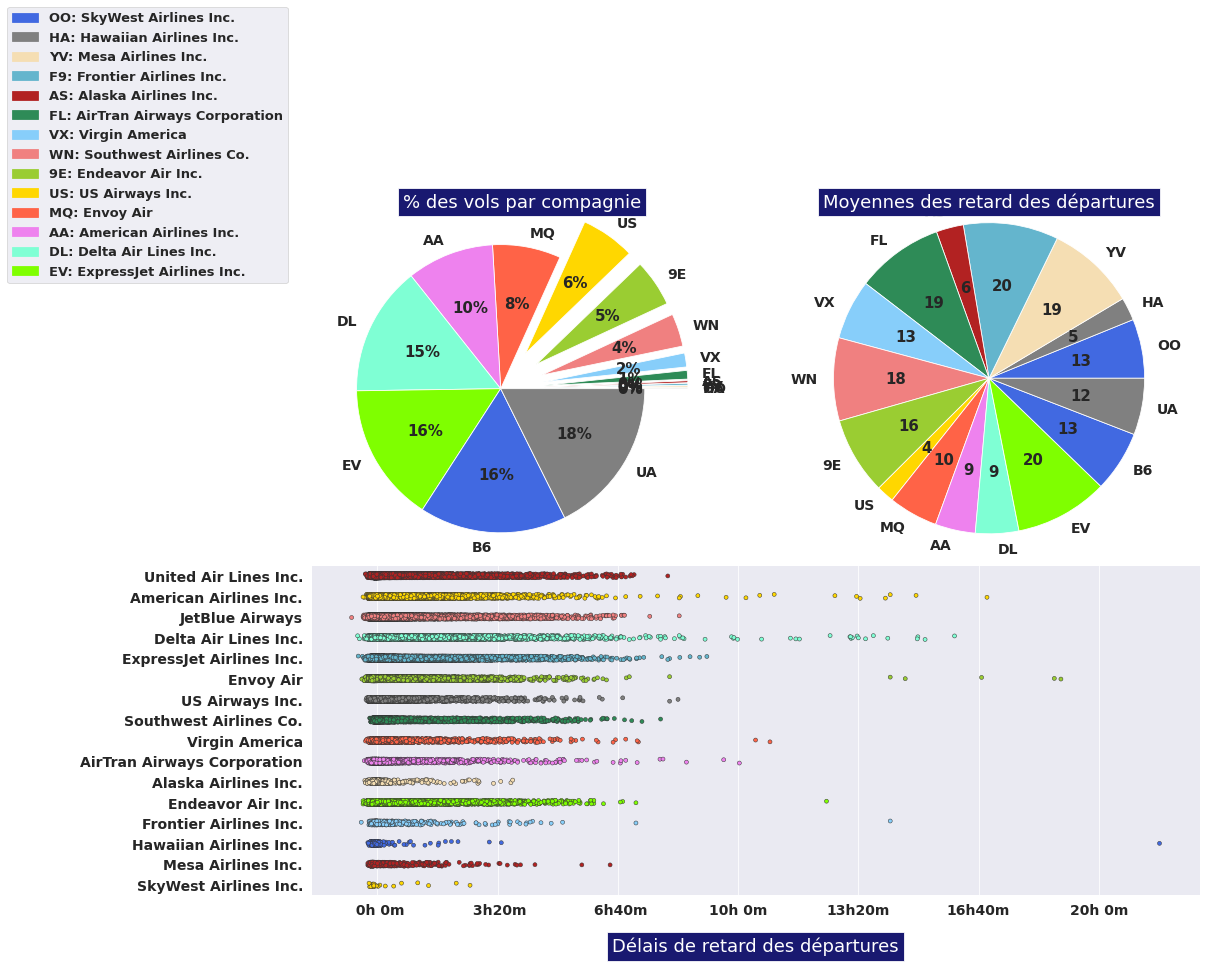

In [ ]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# Extraire les données contenant leurs noms et les délai de départs
df2 = flights_clean.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: Nombre de vols
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% des vols par compagnie', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# Legende: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)-2):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: Moyenne de délai de départs
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Moyennes des retard des départures', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# Stripplot avec les délais de départ de chaque compagnies
#___________________________________________________________________
# Les couleurs du graphique
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Délais de retard des départures', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

En considérant le premier camembert qui donne le pourcentage de vols par compagnie aérienne, on voit qu'il y a une certaine disparité entre les transporteurs.Par exemple, United Air Lines représente ∼ 18% des vols ce qui est similaire au nombre de vols . 

Cependant, si nous regardons le deuxième graphique à secteurs, nous voyons qu'ici, au contraire, les différences entre les compagnies aériennes sont moins prononcées.En excluant Hawaiian Airlines et Alaska Airlines qui signalent des retards moyens extrêmement faibles, nous obtenons qu'un une valeur de ∼ 11 ± 7 minutes représenterait correctement tous les retards moyens. Notez que cette valeur est assez faible ce qui signifie que la norme pour chaque compagnie aérienne est de respecter l'horaire!

Enfin, la figure du bas fait un recensement de tous les retards mesurés. Cette représentation donne une idée de la dispersion des données et met en perspective l'homogénéité relative apparue dans le deuxième camembert. En effet, on voit que si tous les retards moyens sont de l'ordre de 10 minutes, cette faible valeur est une conséquence du fait qu'une majorité de vols décollent à l'heure. Cependant, on voit qu'à l'occasion, on peut faire face à des retards vraiment importants qui peuvent atteindre quelques dizaines d'heures!

#####***2.3 Influenece des aéroports d'origine sur les départs :***

Dans cette section, On examinera les variations des retards par rapport à l'aéroport d'origine et pour chaque compagnie aérienne. 

In [ ]:
temp = pd.read_csv('data/airports.csv')
identify_airport = temp.set_index('faa')['name'].to_dict()
latitude_airport = temp.set_index('faa')['lat'].to_dict()
longitude_airport = temp.set_index('faa')['lon'].to_dict()

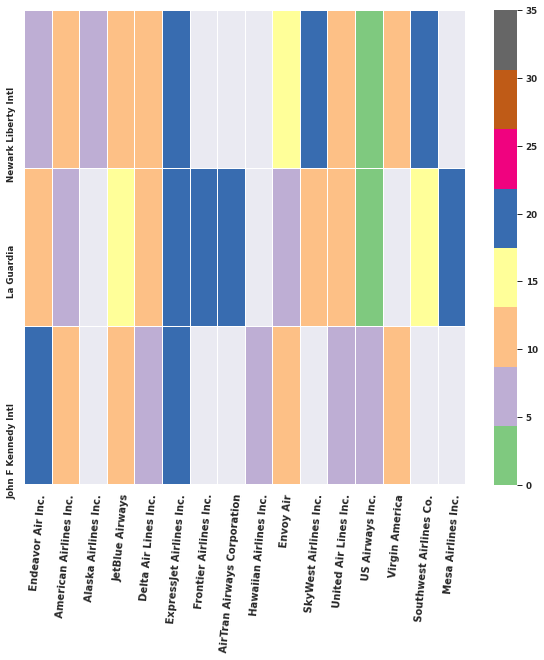

In [ ]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(16,16))

ax = fig.add_subplot(2,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)


plt.tight_layout()

**Descriptions :**  




Ce chiffre permet de tirer quelques conclusions. Tout d'abord, en regardant les données associées aux différentes compagnies aériennes, on retrouve le comportement que nous avons observé précédemment: par exemple, on verra que la colonne associée aux compagnies express signale des retards importants, tandis que la colonne associée à US AIRWAYS est principalement associée à retards de moins de 5 minutes.

Si nous regardons maintenant les aéroports d'origine, nous verrons que certains aéroports favorisent les départs tardifs: voir par exemple La guardia.

L'aéroport de JFK signale le moins de retard sur tous les vols

#####***2.4 HeatMap***

In [ ]:
flights['date_converted']= pd.to_datetime(flights['time_hour']).dt.date
flights['DayOfWeek']= pd.to_datetime(flights['date_converted']).dt.dayofweek
days=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']

import datetime as dt
months = []
for month in range(1, 13):
    months.append(dt.datetime(year=1994, month=month, day=1).strftime("%B"))

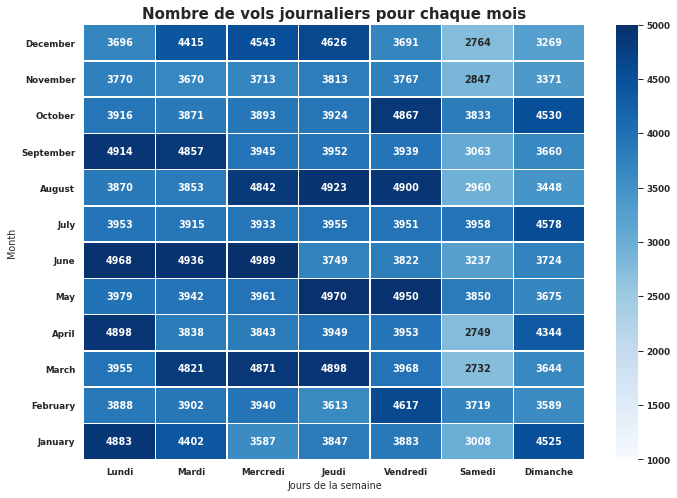

In [ ]:
# HeatMap pour une visualisation meilleurs des données
pddf=pd.DataFrame({'count' : flights.groupby( ['month', 'DayOfWeek'] ).size()}).reset_index()
pddf = pddf.pivot("month", "DayOfWeek", "count")
fig, ax=plt.subplots(figsize=(10,8))
ax = sns.heatmap(pddf, 
                  linewidths=.5,
                  annot=True,
                  vmin=1000,
                  vmax=5000,
                  fmt='d',
                  cmap='Blues', ax=ax)
# Les labesls des plots
ax.set_xticklabels(days)
ax.set_yticklabels(list(reversed(months)), rotation=0)
ax.set(xlabel='Jours de la semaine', ylabel='Month')
ax.set_title("Nombre de vols journaliers pour chaque mois", fontweight="bold", size=15)

plt.show()

Chaque mois a ses propres données, par exemple, en janvier, il y a plus de vols le dimanche et le lundi alors qu'en mars, ils sont pendant la semaine et descendent le week-end.

De plus, la carte thermique peut offrir une meilleure visualisation des données pour rechercher des informations pertinentes provenant des données. La carte montre mieux la différence entre les jours de la semaine et les week-ends, le plus grand nombre de vols se fait toujours pendant la semaine tandis que les minimums sont le week-end, même si certains week-ends présentent des valeurs croissantes dans les mois contenant des vacances comme Noël, l'été ou les vacances de printemps .

#####***2.5 Pourcentage des vols retardés par heure***

Un vol est considéré comme retardé si son heure d'arrivée réelle est plus de 15 minutes plus tard que l'heure d'arrivée prévue.

In [ ]:
flights.loc[(flights.arr_delay == ' '),'arr_delay']=0
flights['arr_delay'] = flights['arr_delay'].astype(int) 

In [ ]:
# Nombre de vols retardés par heure
df_flights_hour_delay = pd.DataFrame({'count' : flights[flights.arr_delay > 1].groupby('hour').size()}).reset_index()

# nNombre de vols par heure
df_flights_hour = pd.DataFrame({'count' : flights.groupby('hour').size()}).reset_index()


# Pourcentage de vols retardés par heure
df=ps.sqldf('select h.hour,(d.count*1.0/h.count)*100 as percentage  from df_flights_hour  h join df_flights_hour_delay d on d.hour=h.hour')
percentage_hour_delay = df[['hour','percentage']]

[]

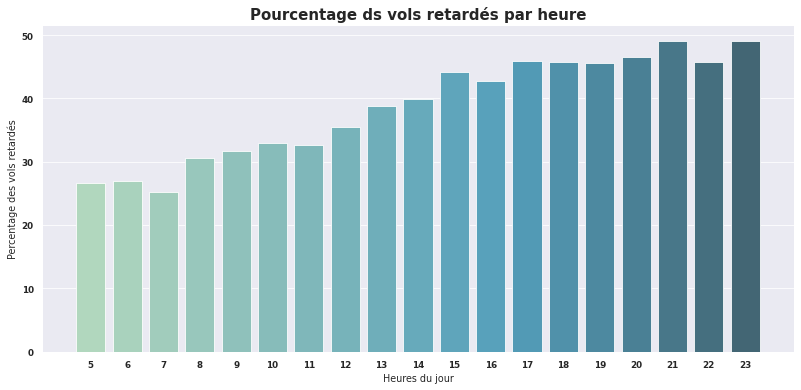

In [ ]:
# create the pandas dataframe
# plot the percentage of flights in delay per hour
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="hour",
            y="percentage",
            data=percentage_hour_delay,
            palette=sns.color_palette("GnBu_d", 24),
            ax=ax)

# set plot's labels
ax.set(xlabel='Heures du jour', ylabel='Percentage des vols retardés')
ax.set_title("Pourcentage ds vols retardés par heure", fontweight="bold", size=15)

plt.plot()

Ce graphique montre que, même si le graphique précédent montrait un très faible nombre de vols de nuit, il y a un pourcentage non indifférent de vols retardés aux heures tardives (jusqu'à 48%). En particulier, on peut facilement remarquer que le pourcentage commence à augmenter à 8 heures du matin et atteint ses valeurs maximales entre 21 et 23 (plus d'un vol sur 2 (48%)), puis il diminue à nouveau. 